In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton
from scipy.optimize import minimize

%matplotlib inline

In [2]:
# Constants
Msun = 1.989e33  # in g
G = 6.674e-8  # in cgs
secday = 3600.0*24.0
secyer = 3600.0*24.0*365.25
AUincm = 1.496e13
pcincm = 3.086e18

# Parameters of 51 Pegasus
mass_51_Peg = 1.11
mass_planet = 4.72e-4

In [125]:
rv_err = '3.3 3.6 4.5 2.9 2.6 3.0 2.2 2.5 3.2 2.7 3.3 4.7 4.9 5.2 6.5 4.6 6.2 5.4 5.5 4.4 7.3 4.6 4.6 5.6 5.0 4.6 6.6 4.4 6.0 5.2 5.4 6.5 4.7 4.8 4.7 4.0 4.0 5.2 4.5 4.3 6.4 5.1 4.4 4.9 7.5 2.6 3.0 3.7 4.6 4.5 4.7 6.1 6.1 6.7 7.7 4.3 6.3 5.2 6.5 4.7 4.8 4.8 4.6 6.6 4.3 4.5 4.3 5.6 7.5 6.1 5.0 5.3 5.0 5.7 5.9 4.3 4.3 4.7 4.4 4.6 4.6 7.5 2.4 9.3 5.1 4.7 5.2 4.6 4.4 4.8 6.1 4.9 4.4 5.9 4.5 7.0 6.6 6.1 4.6 4.6 5.3 4.9 6.7 5.8 7.2 6.0 4.2 4.5 4.6 4.4 4.4'
rv_err = np.fromstring(rv_err, sep=' ')

rv = '40.87 46.96 47.39 19.85 13.47 5.782 ' +\
     '49.41 58.66 63.20 45.60 17.88 45.50 ' +\
     '38.98 27.27 32.45 63.38 54.78 1.340 ' +\
     '5.477 10.73 26.29 50.68 45.78 57.54 ' +\
     '10.56 12.91 16.40 63.64 60.48 26.29 ' +\
     '5.988 7.798 43.62 59.45 58.60 20.22 ' +\
     '8.064 5.596 56.41 59.26 66.78 35.13 ' +\
     '37.30 31.35 42.57 33.47 27.46 22.70 ' +\
     '45.34 47.61 56.15 65.32 69.63 62.54 ' +\
     '50.86 22.66 22.55 31.82 31.72 44.12 ' +\
     '33.59 37.10 39.13 35.32 25.09 35.69 ' +\
     '41.17 61.33 58.98 63.07 56.86 50.98 ' +\
     '2.545 0.763 4.599 38.53 48.68 38.84 ' +\
     '2.696 11.46 14.02 17.55 19.74 41.45 ' +\
     '21.47 20.37 21.67 49.31 35.66 38.28 ' +\
     '34.98 37.54 24.00 73.89 58.57 13.45 ' +\
     '21.90 47.91 1.292 60.15 10.59 49.72 ' +\
     '22.41 41.06 42.39 40.99 61.66 47.51 ' +\
     '40.99 45.03 53.51'
rv = np.fromstring(rv, sep=' ')


time =  '2.67365 2.80873 2.95979 3.62695 3.73265 ' +\
        '3.90077 4.60753 4.78429 4.90699 5.60503 ' +\
        '5.92544 11.6443 11.8378 12.6355 12.8664 ' +\
        '13.6242 13.8295 14.6428 14.7229 14.8161 ' +\
        '14.9043 15.6261 15.7467 15.8654 16.6149 ' +\
        '16.7592 16.8474 17.7341 17.8442 18.6161 ' +\
        '18.7648 18.8540 19.6218 19.7325 19.8473 ' +\
        '20.6137 20.7401 20.8543 21.6151 21.6620 ' +\
        '21.7063 23.5986 23.6448 23.6904 23.7258 ' +\
        '24.6391 24.7261 24.8174 25.6226 25.7145 ' +\
        '25.7615 26.6176 26.6508 26.7020 26.7366 ' +\
        '27.6474 27.6893 27.7399 27.7721 28.6061 ' +\
        '28.6556 28.7019 28.7450 28.7799 29.6093 ' +\
        '29.7001 29.7468 30.6004 30.6454 30.6930 ' +\
        '30.7402 30.8334 31.6619 31.7052 31.7492 ' +\
        '32.6045 32.6479 32.6943 33.6073 33.6527 ' +\
        '33.6982 33.7331 35.5970 40.7493 41.6045 ' +\
        '41.6932 41.7388 43.6442 44.6498 45.6065 ' +\
        '46.6779 46.7230 58.5843 68.6826 72.6462 ' +\
        '73.6713 86.7296 87.5888 88.6111 89.6847 ' +\
        '90.6612 91.6137 182.026 215.981 232.969 ' +\
        '235.954 262.991 288.933 298.923 304.889 326.896'
time = np.fromstring(time, sep=' ')
time = time*secday  # Convert from days to seconds

In [126]:
def P_to_a(M1, M2, P):
    """ Orbital period (seconds) to separation (AU) """
    mu = G * (M1 + M2)
    n = 2.0*np.pi / P
    return np.power(mu/(n*n), 1.0/3.0) / AUincm

def a_to_P(M1, M2, a):
    """ Orbital separation (AU) to period (seconds) """
    mu = G * (M1 + M2)
    n = np.sqrt(mu/(a**3 * AUincm**3))
    return 2.0*np.pi / n


def get_f(p, t_set):
    """
    Calculate the true anomaly

    Arguments
    ---------
    p : tuple
        Set of model parameters
    t_set : float, numpy array
        Observations times for true anomaly calculation

    Returns
    -------
    f_set : float, numpy array
        Set of true anomalies
    """

    # Load model parameters
    Omega, omega, I, tau, e, P, gamma = p
    
    M1 = mass_51_Peg * Msun
    M2 = mass_planet * Msun

    # Calculate orbital separation
    mu = G * (M1 + M2)
    n = 2.0*np.pi / P
    A = np.power(mu/(n*n), 1.0/3.0)
    
    # Kepler's equation
    def func_E(x,n,t,tau,e):
        return n*(t-tau) - x + e*np.sin(x)

    # Iterate through t_set, calculate eccentric anomaly - requires a root finder, so cannot be vectorized
    E_set = np.array([])
    if isinstance(t_set, np.ndarray):
        
        for t in t_set:
            try:
                # Use Newton root-finder to solve Kepler's equation
                E_new = newton(func_E, t, args=(n,t,tau,e))
            except:
                return None
            E_set = np.append(E_set, E_new)
    else:

        try:
            # Use Newton root-finder to solve Kepler's equation
            E_new = newton(func_E, t_set, args=(n,t_set,tau,e))
        except:
            return None
        E_set = np.append(E_set, E_new)
        
    # For each eccentric anomaly, calculate the true anomaly
    f_set = np.array([])
    for E in E_set:
        f = np.arccos((np.cos(E)-e)/(1.0-e*np.cos(E)))
        if np.sin(E) < 0:
            f = 2.0*np.pi - f

        f_set = np.append(f_set, f)

    return f_set


def get_RV(p, t):
    """
    Calculate the radial velocities

    Arguments
    ---------
    p : tuple
        Set of model parameters
    t : float, numpy array
        Observation times

    Returns
    -------
    RV : float
        Radial Velocities
    """

    # Load model parameters
    Omega, omega, I, tau, e, P, gamma = p

    M1 = mass_51_Peg * Msun
    M2 = mass_planet * Msun
    
    # Calculate A
    mu = G * (M1 + M2)
    n = 2.0*np.pi / P
    A = np.power(mu/(n*n), 1.0/3.0)
    
    # Get true anomalies
    f = get_f(p, t)
    if f is None: return None
    
    # Get two RV components (these are in cm/s)
    rv = n * A / np.sqrt(1.0 - e*e) * (np.cos(omega+f) * np.sin(I) + e * np.cos(omega) * np.sin(I))
    rv = rv * M2 / (M1+M2)

    # Convert from cm/s to km/s
    rv = rv / 1.0e2

    # Adjust for system's radial velocity
    rv = rv + gamma

    return rv


In [116]:
def plot_solution(p):
    
    tmp_time = np.linspace(0, 100*secday, 1000)
    
    rv_model = np.zeros(len(tmp_time))
    for i, time in enumerate(tmp_time):
        rv_model[i] = get_RV(p, time)
        
    plt.plot(tmp_time/secday, rv_model)

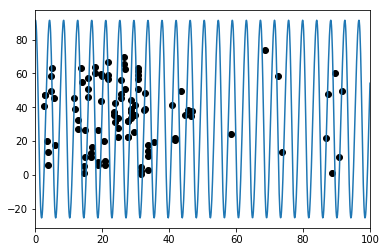

In [143]:
Omega = np.pi/2.0
omega = np.pi/2.0
I = np.pi/2.0
tau = 1.0 * secday
e = 0.1
P = 4.2 * secday
gamma = 33.0

p0 = Omega, omega, I, tau, e, P, gamma



plt.scatter(time/secday, rv, color='k')

plot_solution(p0)

plt.xlim(0, 100)

plt.show()

In [146]:
def get_ln_likelihood(p, time, rv, rv_err):
    
    rv_model = np.zeros(len(time))
    for i, t in enumerate(time):
        rv_model[i] = get_RV(p, t)

    neg_ln_likelihood = np.sum((rv-rv_model)**2 / (2.0*rv_err**2))
        
    print(neg_ln_likelihood)
        
    return neg_ln_likelihood

def get_ln_prior(p):
    
    Omega, omega, I, tau, e, P, gamma = p
    
    if e < 0 or e > 1.0: return -np.inf
    if I<0 or I>np.pi: return -np.inf
    if Omega < 0 or Omega > 2.0*np.pi: return -np.inf
    if omega < 0 or omega > 2.0*np.pi: return -np.inf
    if P<0: return -np.inf
    
    return 0.0
    
def get_neg_ln_posterior(p, time, rv, rv_err):
    
    return -get_ln_likelihood(p, time, rv, rv_err) + get_ln_prior(p)

In [152]:
Omega = np.pi/2.0
omega = np.pi/2.0
I = np.pi/2.0
tau = -1.0 * secday
e = 0.1
P = 4.2 * secday
gamma = 33.0

p0 = Omega, omega, I, tau, e, P, gamma

p0 = 1.57079633e+00,  3.31455429e+00,  2.96811390e+00, -8.64032477e+04, 2.20747785e-08,  3.65470346e+05,  3.64710906e+01


bounds = [(0.0, 2.0*np.pi), (0.0, 2.0*np.pi), (0.0, np.pi), (-10.0*secday, 10.0*secday), 
          (0, 1), (0.1*secday, 10.0*secday), (-100, 100)]
sol = minimize(get_ln_likelihood, p0, 
               args=(time, rv, rv_err), 
               bounds=bounds, 
               method='TNC')
print(sol)



# plt.scatter(time/secday, rv, color='k')

# plot_solution(p0)

# plt.xlim(0, 100)

# plt.show()

791.6426440896148
791.6426440896148
791.6426440896148
791.6426440895758
791.6426440896033
791.642644089615
791.64264857255
791.6426440896145
791.6426440896144
791.6426341897301
791.6426341897301
791.6426341897301
791.6426341896906
791.6426341897192
791.6426341897302
791.6426386726638
791.6426341897302
791.6426341897296
791.6426343537238
791.6426343537238
791.6426343537238
791.6426343537166
791.642634353706
791.6426343537242
791.642638836746
791.6426343537245
791.6426343537242
791.6426341902959
791.6426341902959
791.6426341902959
791.6426341902564
791.6426341902851
791.6426341902961
791.6426386732297
791.6426341902961
791.6426341902954
791.6426341902957
791.6426341902957
791.6426341902957
791.6426341902564
791.642634190285
791.6426341902962
791.6426386732295
791.6426341902961
791.6426341902953
791.6427092947769
791.6427092947769
791.6427092947769
791.6427092959926
791.6427092979493
791.6427092947769
791.6427137784947
791.6427092947775
791.6427092950304
791.6426525787717
791.642652578771

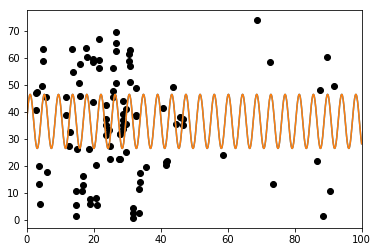

In [153]:
plt.scatter(time/secday, rv, color='k')

plot_solution(sol.x)
plot_solution(p0)

plt.xlim(0, 100)

plt.show()

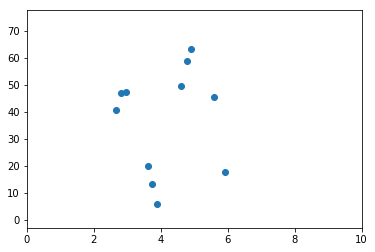

In [16]:
plt.scatter(time, rv)

plt.xlim(0, 10)

plt.show()

### Cosmology example
In this exercise we will load a sample of galaxy cluster masses from Vikhlinin et al. (2009) which can be used to infer cosmological parameters. Cluster masses have been determined in the redshift range $0.025 < z \leq 0.25$.

The idea hypothesis under which we operate is the following: 

Galaxy cluster counts as a function of halo mass = Halo mass function.

$$
\frac{dn(M_{\rm cluster})}{dM_{\rm cluster}} = \frac{dn(M_{\rm halo})}{dM_{\rm halo}}
$$

The goal of this exercise is to model the priors for cosmological parameters $H_0, \, \sigma_8$ and $\Omega_{\rm M}$ and the likelihood that given a model for the mass function (Tinker et al. 2008), we will observe the cluster counts of Vikhlinin et al. (2009).

The likelihood and priors can be used to infer the posterior distribution of the cosmological parameters, given the observational data.

Let us start with the data...

In [235]:
import matplotlib.pyplot as plt
from scipy.optimize import newton
from scipy.optimize import minimize

data_low_z = np.genfromtxt("data/vikhlinin_2009_lowz.txt", skip_header=4, skip_footer=2)
#data_high_z = np.genfromtxt("data/vikhlinin_2009_highz.txt", skip_header=4, skip_footer=2)

mass_low_z = data_low_z[:,10]
mass_low_z_err = data_low_z[:,12]
z_low = data_low_z[:,3]


#mass_high_z = data_high_z[:,8]
#mass_high_z_err = data_high_z[:,10]

The following cells implement the model of Tinker et al. (2008) for the halo mass function, which depends on multiple cosmological parameters:

$$
\frac{dn}{d\log M} = f(\sigma) \frac{\Omega_{\rm M}\rho_{\rm c}}{M}\frac{d\log\sigma^{-1}}{d\log M},
$$

where $\rho_{\rm c} = 3H_0^2/(8\pi G)$ is the critical density of the Universe, $\sigma=\sigma(M)$ is the RMS value of cosmological density fluctuations of mass $M$, and $f(\sigma)$ is a function defined below and provided by Tinker et al. (2008). The model is closed by the relation of Jenkins et al. (2001):

$$
\sigma(M)\approx\sigma_{8}\left(\frac{M}{M_8}\right)^{-\frac{n_{\rm eff}-3}{6}},
$$

where $M_8$ is the average mass enclosed within 8 Mpc, and $n_{\rm eff}\approx-1.0$ for the standard $\Lambda{\rm CDM}$ cosmological model.

Let us start implementing the model with a few useful variables and constants.

In [242]:
Mpc_in_cm = 3.086e24
Mpc_in_km = 3.086e19
Msun_in_g = 1.989e33

# convert G from cgs (cm^3/g/s^2) to Mpc^3/Msun/s^2
G_grav = 6.674e-8 * Msun_in_g / Mpc_in_cm**3

c_light = 3.0e10 

# H_0 is in units of km/s/Mpc

mass_function_amplitude = 0.26
Delta = 500.0
n_eff = -1.0
R_8 = 8.0


H_0 = 67.74
h = H_0/100.0

# survey area is 400 degrees^2
survey_volume = 400.0
z_min_low_z, z_max_low_z = 0.025, 0.25

Let us now implement the rest of the model. 

In [243]:
def calc_a(Delta):
    return 1.43 + (np.log10(Delta) - 2.3)**1.5
def calc_b(Delta):
    return 1.0 + (np.log10(Delta) - 1.6)**(-1.5)
def calc_c(Delta):
    return 1.2 + (np.log10(Delta) - 2.35)**1.6
    
def calc_M_8(H_0):
    return 3.0*(H_0/Mpc_in_km)**2 / (8.0 * np.pi * G_grav) * (4.0*np.pi/3.0) * R_8**3

def calc_sigma(mass, H_0, sigma_8):
    
    M_8 = calc_M_8(H_0)
    sigma = sigma_8 * (mass/M_8)**((-3.0-n_eff)/6.0)
    
    return sigma
    
    
def calc_f_sigma(sigma):
    
    a = calc_a(Delta)
    b = calc_b(Delta)
    c = calc_c(Delta)
        
    f_sigma = np.exp(-c / sigma**2)
    f_sigma *= (b/sigma)**a + 1.0
    f_sigma *= mass_function_amplitude

    return f_sigma



In [244]:
def calc_dn_dlnM(mass, H_0, sigma_8, Omega_M):
    
    sigma = calc_sigma(mass, H_0, sigma_8)
    f_sigma = calc_f_sigma(sigma)
    
    critical_density = 3.0 * (H_0/Mpc_in_km)**2 / (8.0*np.pi*G_grav)
    
    dn_dlnM = f_sigma * Omega_M/mass * critical_density * (n_eff+3.0)/6.0
    
    return dn_dlnM
    

def calc_survey_volume_low_z(H_0):
    
    volume_low_z_high = 1.0/3.0*(c_light/Mpc_in_cm)**3 / (H_0/Mpc_in_km)**3 * z_max_low_z**3 * survey_volume * (4.0*np.pi/41253.0)
    volume_low_z_low = 1.0/3.0*(c_light/Mpc_in_cm)**3 / (H_0/Mpc_in_km)**3 * z_min_low_z**3 * survey_volume * (4.0*np.pi/41253.0)
    volume_low_z = volume_low_z_high - volume_low_z_low
    
    return volume_low_z


def calc_dN_dlnM(mass, H_0, sigma_8, Omega_M):
    
    dn_dlnM = calc_dn_dlnM(mass, H_0, sigma_8, Omega_M)
    dN_dlnM = dn_dlnM * calc_survey_volume_low_z(H_0)
    
    return dN_dlnM

Here, we set the cosmological parameters to some fixed values, then convert the analytical halo mass function to cumulative number counts. Cumulative number counts are given by the following formula (accurate only at low redshift):   

$$
dN(>M) = V\int_M^{+\infty} \frac{dn}{d\log M}d\log M,
$$

where $V$ is the volume where the cluster/halo counts are performed. 

Let us start by computing the cumulative number counts from the theoretical model.

In [245]:
H_0 = 67.74
h = H_0/100
sigma_8 = 0.8159
Omega_M = 0.3089

tmp_M = np.logspace(16, 10, 100)
# tmp_M = np.linspace(16, 14, 100)
# bin_width = tmp_M[0] - tmp_M[1]
bin_width = np.log10(tmp_M[0])-np.log10(tmp_M[1])

dn_dlnM = np.zeros(len(tmp_M))
dN_dlnM = np.zeros(len(tmp_M))

for i, mass in enumerate(tmp_M):
    dn_dlnM[i] = calc_dn_dlnM(mass, H_0, sigma_8, Omega_M)

    dN_dlnM[i] = calc_dN_dlnM(mass, H_0, sigma_8, Omega_M)
    

dN_dlnM = np.cumsum(dN_dlnM * bin_width / calc_survey_volume_low_z(H_0))

In the two cells below, we also compute cumulative cluster counts from the observational data of Vikhlinin et al., then plot the theoretical model against the data. 

For the data we generate Poisson error bars, that represent the statistical uncertainty in measurements of the number of clusters in each mass bin.

In [246]:
from scipy.interpolate import interp1d

effective_volume = np.genfromtxt("./data/effective_volume.csv", delimiter=',')

effective_volume = interp1d(effective_volume[:,0]/h, effective_volume[:,1]/h**3, 
                            bounds_error=False, fill_value=9.28562539e+08)

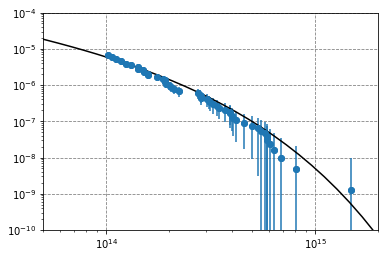

In [247]:
weights = (z_low/z_max_low_z)**3


masses = -np.sort(-mass_low_z)

y_val = np.cumsum(1.0/effective_volume(masses*1.0e14))
y_err = np.sqrt(y_val/calc_survey_volume_low_z(H_0)) # Poisson error bars


# Observed model
plt.scatter(masses*1.0e14*h, y_val/h**3)
plt.errorbar(masses*1.0e14*h, y_val/h**3, y_err/h**3, fmt='o')


# Theoretical model
plt.plot(tmp_M*h, dN_dlnM, color='k')

plt.gca().xaxis.grid(color='gray', linestyle='dashed')
plt.gca().yaxis.grid(color='gray', linestyle='dashed')



plt.xscale('log')
plt.yscale('log')


plt.xlim(5.0e13, 2.0e15)

plt.ylim(1.0e-10, 1.0e-4)


plt.show()

Now we want to model the likelihood of our data given a set of cosmological model parameters. 

CAVEAT: we are modeling number counts of rare objects. The correct distribution to model each bin is the Poisson distribution. If each data bin is independent from the others, we can model the likelihood as the product of the Poisson likelihood of each bin:

$$
L_{i} = \frac{e^{\mu_i} \mu_i^{y_i}}{y_i},
$$

where $\mu_i$ is the expected value of number counts in the $i-$th bin, and $y_i$ is the measured value of the number counts. The likelihood of the whole dataset is given by:

$$
L = \prod_i L_i.
$$

We will try to maximize this likelihood, given some prior on the cosmological parameters. In practice, we will have to minimize $-\log L$. 

### Question: What is its correct expression for $-\log L$?

In [248]:
from scipy.optimize import minimize


# Calculate the x-, y-data
masses = -np.sort(-mass_low_z)
data_x = masses*1.0e14*h
data_y = np.cumsum(1.0/effective_volume(masses*1.0e14))
#error_y = np.sqrt(np.cumsum(np.ones(len(masses)))) / effective_volume(masses*1.0e14)
#error_y = np.sqrt(data_y/calc_survey_volume_low_z(H_0))

def calc_likelihood(p, data_x, data_y):
    
    # Model Parameters
    sigma_8, Omega_M, H_0 = p
    
    # Model Definition
    dN_dlnM_model = np.zeros(len(data_x))

    for i, mass in enumerate(data_x):
        dN_dlnM_model[i] = calc_dN_dlnM(mass/h, H_0, sigma_8, Omega_M)
        
    dN_dlnM_model = np.cumsum(dN_dlnM_model * bin_width / calc_survey_volume_low_z(H_0))    
        
    # Likelihood

    # Chi2 likelihood
    #likelihood = np.sum((dN_dlnM_model - data_y)**2)
   
    # Poisson likelihood
    N_data = data_y*calc_survey_volume_low_z(H_0)
    N_model = dN_dlnM_model*calc_survey_volume_low_z(H_0)
    likelihood = np.sum(N_model-N_data*np.log(N_model))
    
    return likelihood


def calc_likelihood_constr1(p, data_x, data_y, H_0in):
    
    # Model Parameters
    sigma_8, Omega_M = p
    
    # Fixed H_0
    H_0 = H_0in
    
    # Model Definition
    dN_dlnM_model = np.zeros(len(data_x))

    for i, mass in enumerate(data_x):
        dN_dlnM_model[i] = calc_dN_dlnM(mass/h, H_0, sigma_8, Omega_M)
        
    dN_dlnM_model = np.cumsum(dN_dlnM_model * bin_width / calc_survey_volume_low_z(H_0))    
        
    # Likelihood

    # Chi2 likelihood
    #likelihood = np.sum((dN_dlnM_model - data_y)**2)
   
    # Poisson likelihood
    N_data = data_y*calc_survey_volume_low_z(H_0)
    N_model = dN_dlnM_model*calc_survey_volume_low_z(H_0)
    likelihood = np.sum(N_model-N_data*np.log(N_model))
    
    return likelihood

def calc_likelihood_constr2(p, data_x, data_y, H_0in, sigma_8in):
    
    # Model Parameters
    Omega_M = p
    
    # Fixed H_0 and sigma_8
    H_0 = H_0in
    sigma_8 = sigma_8in
    
    # Model Definition
    dN_dlnM_model = np.zeros(len(data_x))

    for i, mass in enumerate(data_x):
        dN_dlnM_model[i] = calc_dN_dlnM(mass/h, H_0, sigma_8, Omega_M)
        
    dN_dlnM_model = np.cumsum(dN_dlnM_model * bin_width / calc_survey_volume_low_z(H_0))    
        
    # Likelihood

    # Chi2 likelihood
    likelihood = np.sum((dN_dlnM_model - data_y)**2)
   
    # Poisson likelihood
    N_data = data_y*calc_survey_volume_low_z(H_0)
    N_model = dN_dlnM_model*calc_survey_volume_low_z(H_0)
    likelihood = np.sum(N_model-N_data*np.log(N_model))
    
    return likelihood

### Once the likelihood has been defined, can we simply maximize it to obtain usful results without introducing priors? 

Try it out...

In [251]:
H_0 = 67.74
h = H_0/100
sigma_8 = 0.8159
Omega_M = 0.3089

p0 = sigma_8, Omega_M, H_0

# Minimization with all parameters
sol = minimize(calc_likelihood, p0, args=(data_x, data_y), tol=1.0e-4)
print(sol)

# Minimization with fixed H_0
H_0 = 67.74
p0 = sigma_8, Omega_M
sol = minimize(calc_likelihood_constr1, p0, args=(data_x, data_y, H_0), tol=1.0e-4)
print(sol)

# Minimization with fixed H_0 and sigma_8
H_0 = 67.74
sigma_8 = 0.8159
p0 = 0.25
sol = minimize(calc_likelihood_constr2, p0, args=(data_x, data_y, H_0, sigma_8), tol=1.0e-4)
print(sol)

/Users/dmartizzi/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in log
/Users/dmartizzi/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in double_scalars


      fun: nan
 hess_inv: array([[ 0.36343256, -0.48096354, -0.00448318],
       [-0.48096354,  0.63660455, -0.00338925],
       [-0.00448318, -0.00338925,  0.9999799 ]])
      jac: array([ nan,  nan,  nan])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 586
      nit: 2
     njev: 117
   status: 2
  success: False
        x: array([ -6402.79719704,   9231.12173358, -82761.19669958])


/Users/dmartizzi/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:61: RuntimeWarning: divide by zero encountered in log


      fun: nan
 hess_inv: array([[ 0.36341708, -0.48098004],
       [-0.48098004,  0.63658845]])
      jac: array([ nan,  nan])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 469
      nit: 2
     njev: 117
   status: 2
  success: False
        x: array([-14940.91650516,  19739.78710523])


/Users/dmartizzi/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:90: RuntimeWarning: invalid value encountered in log


      fun: nan
 hess_inv: array([[1]])
      jac: array([ nan])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 336
      nit: 1
     njev: 112
   status: 2
  success: False
        x: array([-1033.99])


### These results are not too exciting. Can we improve them by modeling the priors? 

E.g. uniform distributions for the cosmological model parameters...

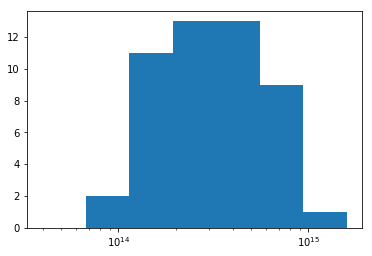

In [83]:
bins = np.logspace(13.6, 15.2, 8)
hist, bin_edges = np.histogram(masses*1.0e14*h, bins=bins)

plt.hist(masses*1.0e14*h, bins=bins)

plt.xscale('log')

plt.show()


# masses*1.0e14*h


# def calc_likelihood(p):
    
#     sigma_8, Omega_m, H_0 = p
    
    
    